In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
air_quality = pd.read_csv("/content/drive/MyDrive/AQI dataset/city_day.csv")

In [ ]:
air_quality.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [ ]:
air_quality[air_quality['AQI_Bucket'].isnull()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,27-01-2020,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,22-02-2020,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,02-03-2020,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,25-04-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_quality.shape

(29531, 16)

In [ ]:
air_quality['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [ ]:
def missing_values_table(df):

        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1]!=
             0].sort_values('% Total Values',
              ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) +
		 " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        return mis_val_table_ren_columns

In [ ]:
missing_values_table(air_quality)

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


,Missing Values,% Total Values
Xylene,18109,61.3
PM10,11140,37.7
NH3,10328,35.0
Toluene,8041,27.2
Benzene,5623,19.0
AQI,4681,15.9
AQI_Bucket,4681,15.9
PM2.5,4598,15.6
NOx,4185,14.2
O3,4022,13.6


In [ ]:
air_quality.interpolate(limit_direction="both", inplace=True)

In [ ]:
missing_values_table(air_quality)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% Total Values
AQI_Bucket,4681,15.9


In [ ]:
for i,each in enumerate(air_quality['AQI_Bucket']):
    if pd.isnull(air_quality['AQI_Bucket'].iloc[i]):
        if (air_quality['AQI'].iloc[i]>=0.0) and (air_quality['AQI'].iloc[i]<=50.0):
            air_quality['AQI_Bucket'].iloc[i]='Good'
        elif air_quality['AQI'].iloc[i]>=51.0 and air_quality['AQI'].iloc[i]<=100.0:
            air_quality['AQI_Bucket'].iloc[i]='Satisfactory'
        elif air_quality['AQI'].iloc[i]>=101.0 and air_quality['AQI'].iloc[i]<=200.0:
            air_quality['AQI_Bucket'].iloc[i]='Moderate'
        elif air_quality['AQI'].iloc[i]>=201.0 and air_quality['AQI'].iloc[i]<=300.0:
            air_quality['AQI_Bucket'][i]='Poor'
        elif air_quality['AQI'].iloc[i]>=301.0 and air_quality['AQI'].iloc[i]<=400.0:
            air_quality['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            air_quality['AQI_Bucket'].iloc[i]='Severe'

In [ ]:
missing_values_table(air_quality)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% Total Values


In [ ]:
air_quality.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,02-01-2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,03-01-2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,04-01-2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,05-01-2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor


In [ ]:
air_quality.shape

(29531, 16)

In [ ]:
new_data = air_quality.dropna(subset =
 ['AQI_Bucket'], how = 'any')
new_data.shape


(29531, 16)

In [ ]:
new_data = new_data.fillna(0)
new_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,02-01-2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,03-01-2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,04-01-2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,05-01-2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,27-06-2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28-06-2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29-06-2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30-06-2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
for i in range(len(new_data)):

    new_data['Date'][i] = new_data['Date'][i][6:]
new_data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
new_data.rename(columns = {'Date':'Year'},
 inplace = True)
new_data


,City,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
new_data['class'] = new_data.AQI_Bucket.map({'Good':1, 'Poor':1,
'Very Poor':1,
'Satisfactory':1,
'Moderate':1,
'Severe':0})

In [ ]:
new_data

,City,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,class
0,Ahmedabad,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,1
1,Ahmedabad,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,1
2,Ahmedabad,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,1
3,Ahmedabad,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,1
4,Ahmedabad,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,1
29527,Visakhapatnam,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,1
29528,Visakhapatnam,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,1
29529,Visakhapatnam,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,1


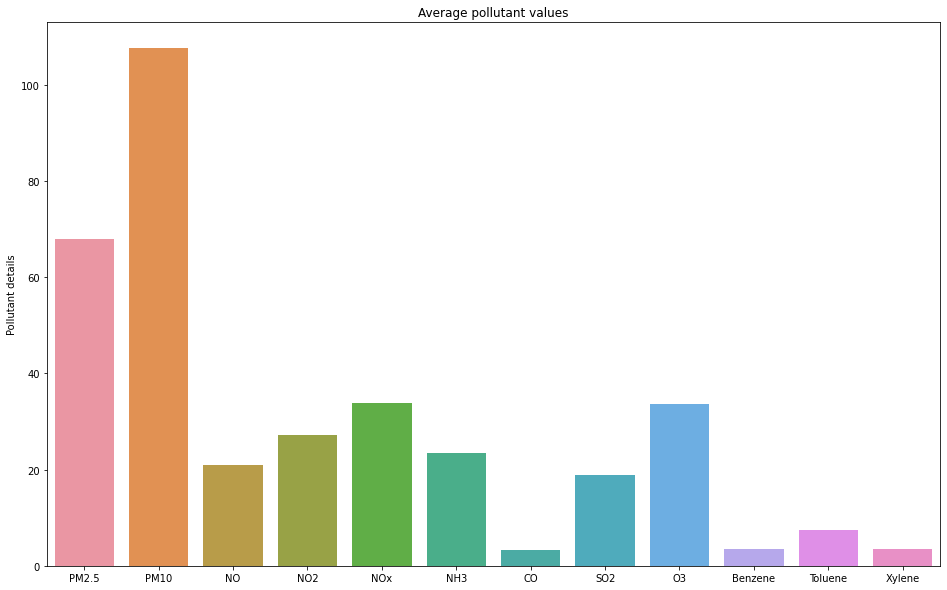

In [ ]:
fig, ax = plt.subplots(figsize = (16, 10))
x = ["PM2.5", "PM10", "NO",
 "NO2", "NOx", "NH3",
 "CO", "SO2", "O3",
 "Benzene", "Toluene", "Xylene"]
y = [new_data['PM2.5'].mean(), new_data['PM10'].mean(),
 new_data['NO'].mean(), new_data['NO2'].mean(),
 new_data['NOx'].mean(), new_data['NH3'].mean(),
 new_data['CO'].mean(), new_data['SO2'].mean(),
 new_data['O3'].mean(), new_data['Benzene'].mean(),
 new_data['Toluene'].mean(), new_data['Xylene'].mean()]
ax = sns.barplot(x, y)
ax.set(ylabel='Pollutant details', title='Average pollutant values')
plt.show()

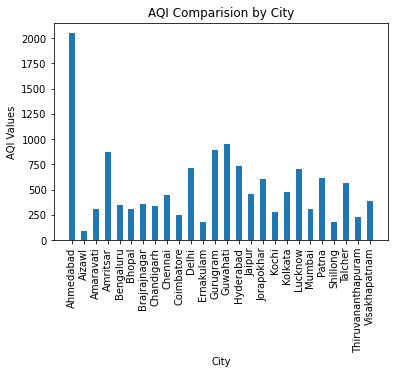

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(new_data['City'],
 new_data['AQI'], width=0.5)

city_names = range(len(new_data['City'].unique()))
plt.xticks(rotation='vertical')
plt.title("AQI Comparision by City")
plt.xlabel("City")
plt.ylabel("AQI Values")
plt.show()

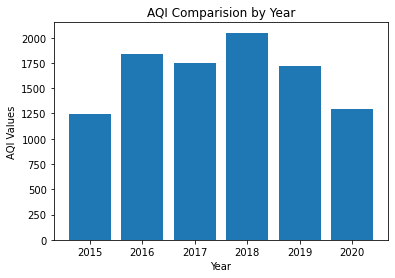

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.bar(new_data['Year'], new_data['AQI'])
plt.title("AQI Comparision by Year")
plt.xlabel("Year")
plt.ylabel("AQI Values")
plt.show()

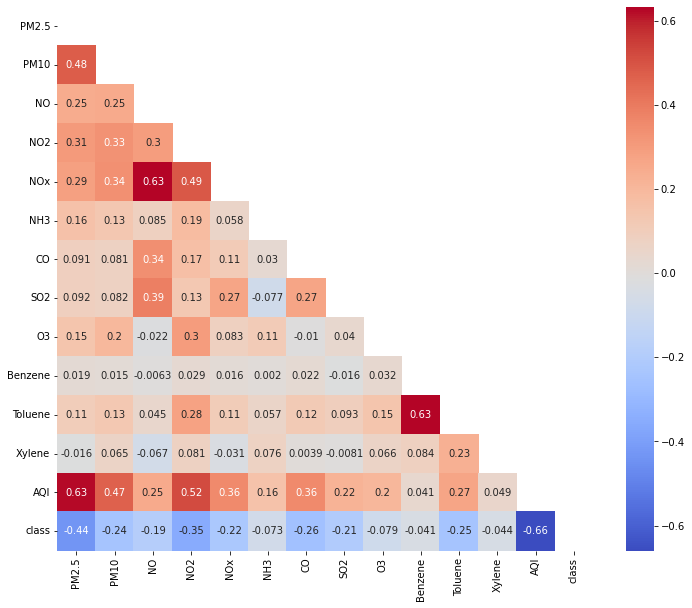

In [ ]:
mask = np.triu(np.ones_like(new_data.corr()))
plt.figure(figsize=(12,10))
sns.heatmap(new_data.corr(), cmap="coolwarm", annot=True, mask=mask)

In [ ]:
original_data = new_data
new_data = new_data.drop(['City',
 'AQI_Bucket'], axis=1)

new_data

,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,class
0,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,1
1,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,1
2,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,1
3,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,1
4,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,1
29527,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,1
29528,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,1
29529,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,1


In [ ]:
original_data

,City,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,class
0,Ahmedabad,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,1
1,Ahmedabad,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,1
2,Ahmedabad,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,1
3,Ahmedabad,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,1
4,Ahmedabad,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,1
29527,Visakhapatnam,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,1
29528,Visakhapatnam,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,1
29529,Visakhapatnam,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,1


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     29531 non-null  object 
 1   PM2.5    29531 non-null  float64
 2   PM10     29531 non-null  float64
 3   NO       29531 non-null  float64
 4   NO2      29531 non-null  float64
 5   NOx      29531 non-null  float64
 6   NH3      29531 non-null  float64
 7   CO       29531 non-null  float64
 8   SO2      29531 non-null  float64
 9   O3       29531 non-null  float64
 10  Benzene  29531 non-null  float64
 11  Toluene  29531 non-null  float64
 12  Xylene   29531 non-null  float64
 13  AQI      29531 non-null  float64
 14  class    29531 non-null  int64  
dtypes: float64(13), int64(1), object(1)
memory usage: 4.6+ MB


In [ ]:
new_data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,class
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,68.029465,107.667705,20.905869,27.143410,33.917200,23.473983,3.328659,18.966607,33.576828,3.425783,7.533835,3.399624,162.891656,0.949714
std,66.169367,83.592414,29.030479,23.784354,32.158578,23.486885,13.002123,27.376500,21.182258,15.761392,18.281074,5.617543,136.633869,0.218538
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,28.785590,51.013232,5.940000,11.290000,13.890000,9.301766,0.500000,5.870000,18.710000,0.140000,0.440000,0.250000,78.000000,1.000000
50%,47.780000,82.990000,10.390000,20.275099,24.480000,17.010000,0.910000,9.680000,29.760000,1.150000,2.530000,2.601738,116.000000,1.000000
75%,82.785000,141.540000,22.850000,35.240000,42.380000,29.500000,1.510000,17.660000,43.828103,3.250000,7.722872,4.737919,204.000000,1.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,1.000000


In [ ]:
new_data['PM2.5'].mean()

68.02946547695642

In [ ]:
new_data.shape[0]

29531

In [ ]:
new_data.columns

Index(['Year', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'class'],
      dtype='object')

In [ ]:
from sklearn.metrics import (confusion_matrix, classification_report,
matthews_corrcoef,
cohen_kappa_score,
accuracy_score,
precision_score,
f1_score,recall_score)

In [ ]:
X = new_data.drop(labels = 'class', axis=1)
y = new_data.loc[:, 'class']

# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 0.3, random_state=1, stratify=y)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression()

logR.fit(X_train, y_train)

predictR = logR.predict(X_test)

print("Classification report of Logistic Regression Results:")

print(classification_report(y_test, predictR))

print(precision_score(y_test, predictR))
print(f1_score(y_test, predictR))
print(recall_score(y_test, predictR))

accuracy = cross_val_score(logR, X, y, cv=50)

#print("Cross validation test results of accuracy:")

print(accuracy)
print("Accuracy result:", accuracy.mean()*100)

cm1 = confusion_matrix(y_test,predictR)
print("Confusion Matrix result Decision Tree is:\n",cm1)
print("")

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print("Sensitivity : ",sensitivity1)
print("")

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print("Specificity : ",specificity1);
print("")


Classification report of Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       446
           1       1.00      1.00      1.00      8414

    accuracy                           1.00      8860
   macro avg       1.00      0.96      0.97      8860
weighted avg       1.00      1.00      1.00      8860

0.9952679522063173
0.9975692179996443
0.9998811504635132
[1.         0.96446701 0.98815567 1.         1.         1.
 1.         0.99830795 1.         0.99830795 1.         1.
 1.         1.         0.99661591 0.99661591 0.99830795 0.99830795
 0.96446701 0.98138748 1.         0.99153976 0.98815567 0.97631134
 0.99492386 0.98815567 0.99830795 0.99492386 0.99153976 0.99153976
 0.99492386 0.99661017 0.99152542 0.96949153 0.98644068 0.99152542
 0.98644068 0.98135593 1.         0.99830508 0.98983051 0.99491525
 0.98305085 0.99661017 0.99152542 0.98644068 0.99152542 0.98135593
 0.98644068 0.98135593]
Accuracy result: 9

In [ ]:
val = {'Model' : ['Logistic Regression'], 'Accuracy':[accuracy.mean()*100],
 'Precision':[precision_score(y_test, predictR)*100],
 'F1_score':[f1_score(y_test, predictR)*100],
'Recall':[recall_score(y_test, predictR)*100]}
metrics_df = pd.DataFrame(val, columns=['Model','Accuracy',
'Precision','F1_score','Recall'])
metrics_df.head()

,Model,Accuracy,Precision,F1_score,Recall
0,Logistic Regression,99.160016,99.526795,99.756922,99.988115


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [ ]:
original_data['AQI_Bucket'] = original_data['AQI_Bucket'].map({'Good':0,
 'Satisfactory':1,
'Moderate':2,'Poor':3,
'Very Poor':4,
'Severe':5})
original_data

,City,Year,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,class
0,Ahmedabad,2015,73.24,141.54,0.92,18.22,17.15,26.64,0.92,27.64,133.36,0.00,0.02,0.00,209.0,3,1
1,Ahmedabad,2015,73.24,141.54,0.97,15.69,16.46,26.64,0.97,24.55,34.06,3.68,5.50,3.77,209.0,3,1
2,Ahmedabad,2015,73.24,141.54,17.40,19.30,29.70,26.64,17.40,29.07,30.70,6.80,16.40,2.25,209.0,3,1
3,Ahmedabad,2015,73.24,141.54,1.70,18.48,17.97,26.64,1.70,18.59,36.08,4.43,10.14,1.00,209.0,3,1
4,Ahmedabad,2015,73.24,141.54,22.10,21.42,37.76,26.64,22.10,39.33,39.31,7.01,18.89,2.78,209.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,0,1
29527,Visakhapatnam,2020,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,1,1
29528,Visakhapatnam,2020,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,1,1
29529,Visakhapatnam,2020,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,1,1


In [ ]:
X1 = original_data[['AQI']]
y1 = original_data[['AQI_Bucket']]

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score

X1_train1, X1_test1, y1_train1, y1_test1 = train_test_split(X1,
 y1, random_state = 0)


m1 = RandomForestClassifier(random_state=0).fit(X1_train1,
y1_train1)


y1_pred = m1.predict(X1_test1)

print("Accuracy : ",accuracy_score(y1_test1, y1_pred))

print("Classification report :\n", classification_report(
y1_test1,y1_pred))
print(" ")

Accuracy :  0.9998645537044561
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       389
           1       1.00      1.00      1.00      2507
           2       1.00      1.00      1.00      2571
           3       1.00      1.00      1.00       873
           4       1.00      1.00      1.00       685
           5       1.00      1.00      1.00       358

    accuracy                           1.00      7383
   macro avg       1.00      1.00      1.00      7383
weighted avg       1.00      1.00      1.00      7383

 


In [ ]:
val = {'Model' : ['Random Forest'], 'Accuracy':[accuracy_score(y1_test1,
 y1_pred)*100], 'Precision':[precision_score(y1_test1,
y1_pred,
 pos_label='positive', average='macro')*100],
 'F1_score':[f1_score(y1_test1, y1_pred,
 pos_label='positive', average='macro')*100],
'Recall':[recall_score(y1_test1, y1_pred,
 pos_label='positive', average='macro')*100]}
metrics_df_rf = pd.DataFrame(val, columns=['Model',
'Accuracy','Precision','F1_score','Recall'])

metrics_df_rf.head()

,Model,Accuracy,Precision,F1_score,Recall
0,Random Forest,99.986455,99.993355,99.973367,99.953445


# K-Nearest Neighbor

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()

knnc.fit(X_train,y_train)
predictR = knnc.predict(X_test)

print("")
print("Classification report of K_Nearest Neighbor Results:")
print("")

print(classification_report(y_test,predictR))
accuracy = cross_val_score(knnc,X,y,cv=50)
print("Cross validation test results of accuracy:")
print(accuracy)
print("")

print("")
print("Accuracy result of K-Nearest Neighbor is:",accuracy.mean()*100)
print("")

cm1 = confusion_matrix(y_test,predictR)
print("Confusion Matrix result of K-Nearest Neighbor is:\n",cm1)
print("")

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print("Sensitivity : ",sensitivity1)
print("")

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print("Specificity : ",specificity1);
print("")


Classification report of K_Nearest Neighbor Results:

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       446
           1       0.99      1.00      1.00      8414

    accuracy                           0.99      8860
   macro avg       0.98      0.95      0.96      8860
weighted avg       0.99      0.99      0.99      8860

Cross validation test results of accuracy:
[0.75803723 0.84433164 0.97461929 1.         0.99492386 1.
 1.         1.         1.         1.         0.99830795 0.99830795
 1.         0.99830795 1.         1.         0.99830795 0.94585448
 0.92893401 0.97461929 0.99661591 0.94754653 0.97969543 0.97292724
 0.99492386 0.97631134 0.99830795 0.98646362 0.98307953 0.98646362
 0.98477157 0.99491525 0.96101695 0.93220339 0.97627119 0.95084746
 0.98305085 0.97288136 1.         0.99322034 0.97288136 0.9440678
 0.93728814 0.98983051 0.96949153 0.98135593 0.98305085 0.9779661
 0.99152542 0.96101695]


Accuracy result of K-Ne

In [ ]:
val = {'Model' : ['KNN'], 'Accuracy':
[accuracy.mean()*100],
 'Precision':[precision_score(y_test, predictR, pos_label='positive',
 average='macro')*100], 'F1_score':[f1_score(y_test, predictR,
 pos_label='positive', average='macro')*100],
'Recall':[recall_score(y_test, predictR, pos_label='positive',
 average='macro')*100]}
metrics_df_knn = pd.DataFrame(val, columns=['Model','Accuracy',
'Precision','F1_score','Recall'])

metrics_df_knn.head()


,Model,Accuracy,Precision,F1_score,Recall
0,KNN,97.389079,97.920421,96.276695,94.753912


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

dtree.fit(X_train, y_train)

predictDT = dtree.predict(X_test)

print("")
print("")
print("Classification report of Decision Tree Results:")
print(classification_report(y_test, predictDT))
print("")

accuracy = cross_val_score(dtree,X,y,cv=50)
print("Cross validation test results of accuracy:")
print(accuracy)
print("")

print("")
print("Accuracy result of Decision Tree is:",
accuracy.mean()*100)
print("")

cm1 = confusion_matrix(y_test,predictDT)
print("Confusion Matrix result Decision Tree is:\n",cm1)
print("")

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print("Sensitivity : ",sensitivity1)
print("")

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print("Specificity : ",specificity1);
print("")



Classification report of Decision Tree Results:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       446
           1       1.00      1.00      1.00      8414

    accuracy                           1.00      8860
   macro avg       0.99      0.99      0.99      8860
weighted avg       1.00      1.00      1.00      8860


Cross validation test results of accuracy:
[0.99830795 0.68020305 0.99661591 0.98984772 1.         1.
 1.         1.         1.         1.         1.         1.
 0.99830795 1.         1.         1.         1.         0.99830795
 1.         1.         1.         0.97969543 1.         0.99492386
 1.         1.         1.         1.         1.         1.
 1.         0.99830508 0.98135593 0.99830508 0.99830508 1.
 0.99661017 0.99661017 1.         1.         0.99491525 0.99322034
 1.         1.         0.99830508 0.99830508 1.         1.
 0.99830508 0.98813559]


Accuracy result of Decision Tree is: 99.15377555995298

C

In [ ]:
val = {'Model' : ['Decision Tree'], 'Accuracy':
[accuracy.mean()*100],
 'Precision':[precision_score(y_test,
 predictDT, pos_label='positive',
 average='macro')*100],
 'F1_score':[f1_score(y_test, predictDT,
 pos_label='positive',
 average='macro')*100],
'Recall':[recall_score(y_test, predictDT,
pos_label='positive', average='macro')*100]}
metrics_df_dt = pd.DataFrame(val, columns=['Model','Accuracy',
'Precision','F1_score','Recall'])

metrics_df_dt.head()

,Model,Accuracy,Precision,F1_score,Recall
0,Decision Tree,99.153776,99.472137,99.047505,98.630939


In [ ]:
logistic= metrics_df.head()
random_forest = metrics_df_rf.head()
knn=metrics_df_knn.head()
decision_tree= metrics_df_dt.head()
compare = pd.concat([logistic,random_forest,knn,decision_tree])
print(compare.reset_index(drop=True))

                 Model   Accuracy  Precision   F1_score     Recall
0  Logistic Regression  99.160016  99.526795  99.756922  99.988115
1        Random Forest  99.986455  99.993355  99.973367  99.953445
2                  KNN  97.389079  97.920421  96.276695  94.753912
3        Decision Tree  99.153776  99.472137  99.047505  98.630939
